# Shopee - Price Match Guarantee

<h1>1.Business/Real-world Problem</h1>

- 1. Shopee is the leading e-commerce platform in Southeast Asia and Taiwan and 'Lowest Price Guarantee' and 'Product Matching'  on all Products is their core principle for their customer retention and satisfaction.

- 2. Shopee wants to avoid misrepresentations and other issues that could come from combining two dissimilar products and to help both retailers and customers.

- 3. Everyday users  upload their own images and write their own product descriptions, adding an extra layer of challenge and creating more duplicate products or near-duplicate products.

- 4. Solving this problem benefits us in some ways like:

      - Helps in more accurate Product categorization and uncover marketplace spam.

      - Customers will benefit from more accurate listings of the same or similar products as they shop.

    - This will help customers and fellow shoppers to hunt for the best deals.


<h2>1.2 Source/Useful Links </h2>

This competition was conducted by Shopee which is the leading e-commerce platform in Southeast Asia and Taiwan. Customers appreciate its easy, secure, and fast online shopping experience tailored to their region. The company also provides strong payment and logistical support along with a 'Lowest Price Guaranteed' feature on thousands of Shopee's listed products.

Know more about the datasets and competitions: https://www.kaggle.com/c/shopee-product-matching/overview

<h1>2. Machine Learning Problem</h1>

<h2>2.1. Mapping the real-world problem to an ML problem</h2>

- we have to build a model that can identify which images contain the same products.

- we have to predict matches for every posting_id. For example, if you an image A matches image B and C then we have to predict like for A it would be  A ---> A B C and we should also include for B ---> B A C and for C ---> C A B.

- we will use product description and get it's word vectors and for Image get the word embeddings and do similarity functions on top of that to get similar images.

- 

<h3>2.2. Performance Metric</h3>

- As part of this case study we are using mean F1 score. 

- The mean is calculated in a sample-wise fashion, meaning that an F1 score is calculated for every predicted row, then averaged.



<h4>Why F1 score is the suitable metric for this?</h4>

- As we know that F1 score can be interpreted as weighted average of precision and recall.

- F1 Score = 2 * (Precision * recall ) / (precision + Recall)

- precision = **TruePositves / (TruePositives + FalsePostives)** and Recall = **TruePositives / (TruePositives + FalseNegatives)**

- considering our problem statement of "shopee Price Match Gaurantee", for every product we have to accurately pridict the exact similar products which means there will be high True Postives and low FalseNegatives(miss-classifications) which indirectly means high Recall and at the same time for a given product there should be less misinterpretations, i.e the product actually is not similar one but is categorize to similar.So we should have less FalsePositives.

- The good metric which will take consideration of both of these is F1 score and we need to calculate for every product-Id and we have to take average of that, so mean-F1 score.

- An F1 score is considered perfect when it's 1 , while the model is a total failure when it's 0.

<h2>2.3. Useful blogs, videos and reference papers</h2>

 - https://wandb.ai/andrada/shopee-kaggle/reports/I-Shopee-Competition-EDA-and-Preprocessing--Vmlldzo1NDEzNzU

 - https://budiryan.medium.com/ﬁrst-place-solution-for-shopee-national-data-science-challenge-2020-b12211242f22

### Importing Libraries

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet') 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
#Importing Necessary Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import scipy
import warnings 
import zipfile
import tqdm
from PIL import Image
from io import BytesIO

warnings.filterwarnings('ignore')

#### Loading Necessary Data Files

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.101 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: https://www.kaggle.com/" "https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/24286/1878097/compressed/train_images.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1623827864&Signature=ULeX3RzuiBAuizVvAXojuGSqollahxBQgLpnppMhU%2FXnK71HSntypELs%2F79O4H5GIHCvMXY1tq9f8ey2tB1hH9n0WhykE00T825tkpuP3uO8X4ANoilDKqXPVEEZ3vHFenLQrL0HovYrPLQ4Vo3nyYD4kOfjMVmTTJChPbEErry2p3ox3nE8UUPjphlyzrPWEM%2FoUtgNA9eWuIwB0U0HquhpS52k650cCIlMvYuTd8S3vvfRgB7j8IrKnCQ%2Bjlkh8YAdcXaCr0%2FmMf6OVCJQlZXTysM078SKL1T3uVyjrm29WP1JukJn36nbATh9oib8bxg1OjHQkSPexF5a%2FF0b9g%3D%3D&response-content-disposition=attachment%3B+filename%3Dtrain_images.zip" -c -O 'train_images.zip'

--2021-06-15 08:31:09--  https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/24286/1878097/compressed/train_images.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1623827864&Signature=ULeX3RzuiBAuizVvAXojuGSqollahxBQgLpnppMhU%2FXnK71HSntypELs%2F79O4H5GIHCvMXY1tq9f8ey2tB1hH9n0WhykE00T825tkpuP3uO8X4ANoilDKqXPVEEZ3vHFenLQrL0HovYrPLQ4Vo3nyYD4kOfjMVmTTJChPbEErry2p3ox3nE8UUPjphlyzrPWEM%2FoUtgNA9eWuIwB0U0HquhpS52k650cCIlMvYuTd8S3vvfRgB7j8IrKnCQ%2Bjlkh8YAdcXaCr0%2FmMf6OVCJQlZXTysM078SKL1T3uVyjrm29WP1JukJn36nbATh9oib8bxg1OjHQkSPexF5a%2FF0b9g%3D%3D&response-content-disposition=attachment%3B+filename%3Dtrain_images.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.23.128, 74.125.203.128, 74.125.204.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.23.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1805109633 (1.7G) [application/zip]
Saving to: ‘train_images.zip’

train_images.zi

In [ ]:
!wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.101 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: https://www.kaggle.com/" "https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/24286/1878097/compressed/train.csv.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1623827909&Signature=Hoad8CWMI%2FODZfyoJrbgdcQLr9VvvCIqgZWfpVOUujTAoi0bkWdSJtRBvBDndcDlCyRHiwVR4QovFunmTmlMVFisUBTZqJAB6w2MkPqTx%2BncQ%2BIPY7Xqtyo65mKLbFNh%2B%2B9ZKKqftDMWlT%2FLUMCXGm3lIIRPIr8LVIyW85aUEfifTMfOTw0UoXGTo6cXQwYMAOSUk%2FikQiwMKETm6p5hENBYyNCDF%2BI6tZe9sexkboFSMTkeTwbgd2PtrrhtlKLr2fsz4ediqhsxX0Ha1NJ%2B612Y2VZXntGxgoPyM2243IU66%2Bwyd1NtHBtArRDuFRdU8N2nw8ctVHuUM10itI8riQ%3D%3D&response-content-disposition=attachment%3B+filename%3Dtrain.csv.zip" -c -O 'train.csv.zip'

--2021-06-15 08:32:09--  https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/24286/1878097/compressed/train.csv.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1623827909&Signature=Hoad8CWMI%2FODZfyoJrbgdcQLr9VvvCIqgZWfpVOUujTAoi0bkWdSJtRBvBDndcDlCyRHiwVR4QovFunmTmlMVFisUBTZqJAB6w2MkPqTx%2BncQ%2BIPY7Xqtyo65mKLbFNh%2B%2B9ZKKqftDMWlT%2FLUMCXGm3lIIRPIr8LVIyW85aUEfifTMfOTw0UoXGTo6cXQwYMAOSUk%2FikQiwMKETm6p5hENBYyNCDF%2BI6tZe9sexkboFSMTkeTwbgd2PtrrhtlKLr2fsz4ediqhsxX0Ha1NJ%2B612Y2VZXntGxgoPyM2243IU66%2Bwyd1NtHBtArRDuFRdU8N2nw8ctVHuUM10itI8riQ%3D%3D&response-content-disposition=attachment%3B+filename%3Dtrain.csv.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.189.128, 108.177.97.128, 74.125.23.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.189.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2600522 (2.5M) [application/zip]
Saving to: ‘train.csv.zip’

train.csv.zip     

In [ ]:
# import os
 
# for f in os.listdir('/content'):
#   if f.endswith('.jpg'):
#       os.remove(os.path.join(dir, f))

In [ ]:
# Getting the current working directory files
import os
os.getcwd()

print(os.listdir())

['.config', 'c4c71257d72338cf61ec01bb00ffedbd.jpg', 'b6138e1a8112d4c1c1c23d4f62559831.jpg', '60c1927eb225a8f8c0806916de485142.jpg', '8868072f2fbc6126e5d5ae909511d65f.jpg', '1b631e17dacb7962e4ca25343eaf0147.jpg', '7e64aeed2a56e82e294b917fa6e1929d.jpg', '9877284927fc2c8d8fa12e7edbfe59d8.jpg', '253fc73e4b8c768576435921fa5d925d.jpg', '4ce5c6e29f9150b0fb96182f89871c6e.jpg', '0a04c126cd4321af435f0da3f266ea24.jpg', '17654eb57a2ba1e008cdfbd39cf23f86.jpg', 'b3920a7b9c0674d5101ee054cd9447ea.jpg', 'cf1761db9ff5ac1369773ecc71d6a592.jpg', '07ff69895938d59553d4e89f7583464d.jpg', '26c0a940d0d048aeed59f94f4e995132.jpg', 'efa0ffcf227252e33a0f3d120a9024b5.jpg', '35278c5b6a107dc202307c8ebb8c7e51.jpg', '7f8d84e56b98e0cc070b413514bf6580.jpg', 'e6cd3179799b0caba2e1c57a08c5af59.jpg', '13042bdc80230b95553e3a9c6e561f70.jpg', '726cc9ba9fee3a167e3e73894d84da70.jpg', '0e64ffd904f9ca4ee21746e7c6f788e0.jpg', 'ad5ad47a381ac86a54810636e1dd13f1.jpg', 'fd9b97ce19fd4efa4244b06a41ac1c97.jpg', 'b3e949174dc96886981cac36612

In [ ]:
#How to unizip folder: https://stackoverflow.com/questions/50714467/extract-zip-files-using-python

def unzip_folder(zip_folder, destination):
        """
        Args:
            zip_folder (string): zip folder to be unzipped
            destination (string): path of destination folder
            pwd(string): zip folder password

        """
        with zipfile.ZipFile(zip_folder) as zf:
            zf.extractall(
                destination)


#unzipping train_images
source = '/content/train_images.zip'
destination = '/content/'
unzip_folder(source, destination)

#unzipping train.csv
source = '/content/train.csv.zip'
destination = '/content/'
unzip_folder(source, destination)

#1.reading the Files

In [ ]:
# https://distributed.dask.org/en/latest/manage-computation.html
train_data1 = pd.read_csv("train.csv")
print("number of rows in train are {} and columns are {}".format(train_data1.shape[0], train_data1.shape[1]))

number of rows in train are 34250 and columns are 5


In [ ]:
#Looking for the top 5 rows:
train_data1.head(5)

,posting_id,image,image_phash,title,label_group
0,train_129225211,0000a68812bc7e98c42888dfb1c07da0.jpg,94974f937d4c2433,Paper Bag Victoria Secret,249114794
1,train_3386243561,00039780dfc94d01db8676fe789ecd05.jpg,af3f9460c2838f0f,"Double Tape 3M VHB 12 mm x 4,5 m ORIGINAL / DO...",2937985045
2,train_2288590299,000a190fdd715a2a36faed16e2c65df7.jpg,b94cb00ed3e50f78,Maling TTS Canned Pork Luncheon Meat 397 gr,2395904891
3,train_2406599165,00117e4fc239b1b641ff08340b429633.jpg,8514fc58eafea283,Daster Batik Lengan pendek - Motif Acak / Camp...,4093212188
4,train_3369186413,00136d1cf4edede0203f32f05f660588.jpg,a6f319f924ad708c,Nescafe \xc3\x89clair Latte 220ml,3648931069


In [ ]:
#Looking for the top 5 rows:
train_data1.tail(5)

,posting_id,image,image_phash,title,label_group
34245,train_4028265689,fff1c07ceefc2c970a7964cfb81981c5.jpg,e3cd72389f248f21,Masker Bahan Kain Spunbond Non Woven 75 gsm 3 ...,3776555725
34246,train_769054909,fff401691371bdcb382a0d9075dfea6a.jpg,be86851f72e2853c,MamyPoko Pants Royal Soft - S 70 - Popok Celana,2736479533
34247,train_614977732,fff421b78fa7284284724baf249f522e.jpg,ad27f0d08c0fcbf0,KHANZAACC Robot RE101S 1.2mm Subwoofer Bass Me...,4101248785
34248,train_3630949769,fff51b87916dbfb6d0f8faa01bee67b8.jpg,e3b13bd1d896c05c,"Kaldu NON MSG HALAL Mama Kamu Ayam Kampung , S...",1663538013
34249,train_1792180725,ffffa0ab2ae542357671e96254fa7167.jpg,af8bc4b2d2cf9083,FLEX TAPE PELAPIS BOCOR / ISOLASI AJAIB / ANTI...,459464107


In [ ]:
#Looking for the columns|features
train_data1.columns

Index(['posting_id', 'image', 'image_phash', 'title', 'label_group'], dtype='object')

<h4> Features of the Dataset: </h4>

- <b>posting_id </b> - the ID code for the posting.

- <b>image </b> - the image id/md5sum.

- <b>image_phash </b> - a perceptual hash of the image.

- <b>title </b> - the product description for the posting.

- <b>label_group </b> -  ID code for all postings that map to the same product. Not provided for the test set.

#2. Exploratory Data Analysis

#### 2.1 Missing data for various features.

In [ ]:
#Let's count the missing values in each column
train_data1.isnull().sum()

posting_id     0
image          0
image_phash    0
title          0
label_group    0
dtype: int64

- From the above information, we can say that there are no missing values for the data we have.

#### 2.2 Perform Basic Statistics for the Features.

- **posting_id**

In [ ]:
train_data1['posting_id'].describe()

count                34250
unique               34250
top       train_2256260915
freq                     1
Name: posting_id, dtype: object

- Here, from the statistics we can see that all posting_id's are unique

- **image**

In [ ]:
train_data1['image'].describe() 

count                                    34250
unique                                   32412
top       0cca4afba97e106abd0843ce72881ca4.jpg
freq                                        15
Name: image, dtype: object

- Here, out of 34250, 32412 are unique images and '0cca4afba97e106abd0843ce72881ca4.jpg' is the image occured most of the times with frequency count of 15 times and in the following section we try to remove duplicate and near duplicate images as they does not make sense to recommend products to customers with simple color change and differences.

- **image_phash**

In [ ]:
train_data1['image_phash'].describe() 

count                34250
unique               28735
top       fad28daa2ad05595
freq                    26
Name: image_phash, dtype: object

- Here we have 28735 unique image_phashes out of 34250 and 'fad28daa2ad05595' has occured most of the times with frequency count of 26 times

- **title**

In [ ]:
train_data1['title'].describe() 

count                                              34250
unique                                             33117
top       Koko syubbanul muslimin koko azzahir koko baju
freq                                                   9
Name: title, dtype: object

- Here we have 33117 unique image_phashes out of 34250 and 'Koko syubbanul muslimin koko azzahir koko baju' has occured most of the times with frequency count of 9 times

- **label_group** 

In [ ]:
train_data1['label_group'].head()

0     249114794
1    2937985045
2    2395904891
3    4093212188
4    3648931069
Name: label_group, dtype: int64

- Here, label group refers to all postings that map to the same product.

In [ ]:
#let's look at how many unique label Groups are present 
len(train_data1['label_group'].unique())

11014

- There are nearly 11014 unique Label Groups and each product may connect to one or more Label Groups

In [ ]:
#Let's look at the count of some label Groups

#Top 5 counts
label_counts = train_data1['label_group'].value_counts()

print("Top 5 Label Counts: ")
print(label_counts[: 5])

print('*' * 50)

#Last 5 counts
print("Last 5 Label Counts: ")
print(label_counts[-6: -1])
print('*' * 50)


Top 5 Label Counts: 
994676122     51
159351600     51
562358068     51
3113678103    51
1163569239    51
Name: label_group, dtype: int64
**************************************************
Last 5 Label Counts: 
3882731210    2
3996065489    2
517023446     2
2101581536    2
3460538113    2
Name: label_group, dtype: int64
**************************************************


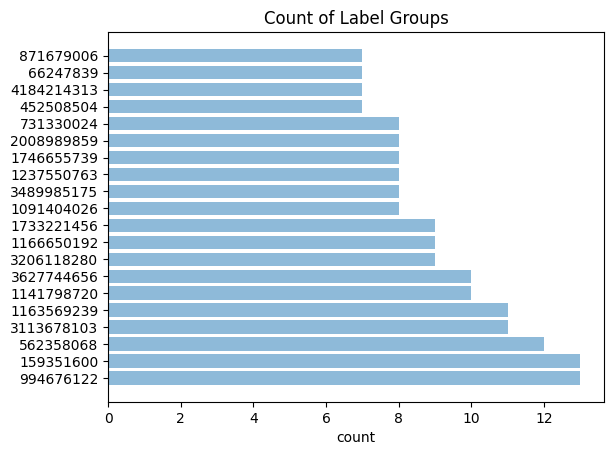

In [ ]:
#getting labels and respective Counts top 20
#referred: https://pythonspot.com/matplotlib-bar-chart/

labels = label_counts[: 20].keys().tolist()
for i in range(0, len(labels)):
  labels[i] = str(labels[i])

counts = label_counts[: 20].values.tolist()

y_pos = np.arange(len(labels))

plt.barh(y_pos, counts, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('count')
plt.title('Count of Label Groups')
plt.show()

- Here From above we can see that labels [994676122, 159351600, 562358068, 3113678103, 1163569239] are the one that repeated most frequent times and [3882731210, 3996065489, 517023446 , 2101581536 , 3460538113] are the one that repeated least number of times

### 2.3 Remove near duplicate items

####  Let's Understand about duplicates.

<h1 align = 'center'><font color='red'>Images</font></h1>

In [ ]:
#Let's First Check out the duplicate terms that related to Images

print(sum(train_data1.duplicated('image')))

1838


- There are 1838 duplicate rows that are contributed by Images..Let's go deep into the images that presenting duplicates to understand it better

Top 5 Image Counts: 
0cca4afba97e106abd0843ce72881ca4.jpg    14
c739a327dbeca472089a5195e898cce4.jpg    12
92394414388e82ccc782fae516933cb3.jpg     8
37c48fec3515e5245dff3dfe268b677b.jpg     8
27a805a3f09f52abdc06c063a08e2803.jpg     8
Name: image, dtype: int64
**************************************************


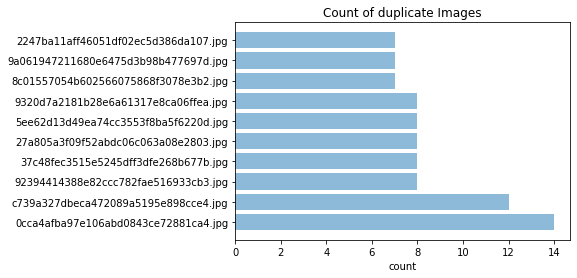

In [ ]:
duplicate_data = train_data1[train_data1.duplicated('image')]
#Let's look at the count of some label Groups
#Top 5 counts
image_counts = duplicate_data['image'].value_counts()

print("Top 5 Image Counts: ")
print(image_counts[: 5])

print('*' * 50)


images = image_counts[: 10].keys().tolist()

counts = image_counts[: 10].values.tolist()

y_pos = np.arange(len(images))

plt.barh(y_pos, counts, align='center', alpha=0.5)
plt.yticks(y_pos, images)
plt.xlabel('count')
plt.title('Count of duplicate Images')
plt.show()

- From the above we see that '0cca4afba97e106abd0843ce72881ca4.jpg' has occured high number of times when compared to others with frequency count of 14

In [ ]:
#getting all images that are duplicated
all_images_dup = train_data1[train_data1.duplicated('image')]['image'].unique()

#sanity check and Samples
print(len(all_images_dup))
print(all_images_dup[: 5])

1246
['001e11145b8e9bf5ac51110c0fdd8697.jpg'
 '00416d439a613fb6cbede5cfc95176e6.jpg'
 '007fca8ce9a042f9e1656ce8f96ba19d.jpg'
 '0082c9c530852846a5f970ca1b8dc334.jpg'
 '00d4a4865fa5c81896287fc2c3ea0e1d.jpg']


<h4><font color='brown'>Product1</font></h4>

Number of Products:  2


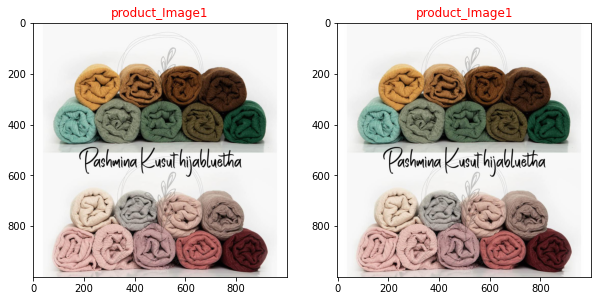

In [ ]:
#Let's get one sample image for the duplicated images
product1 = train_data1[train_data1['image'] == all_images_dup[0]]
print("Number of Products: ", len(product1))

plt.figure(figsize=(10,15))
j = 1

get_img_paths = product1['image'].values.tolist()
for img_path in get_img_paths:

  plt.title('product_Image1', color = 'red')
  img1 = Image.open(img_path)
  plt.subplot(1, 2, j)
  plt.imshow(img1)
  j += 1

plt.title('product_Image1', color = 'red')
plt.show()

<h4><font color='brown'>Product2</font></h4>

Number of Products:  3


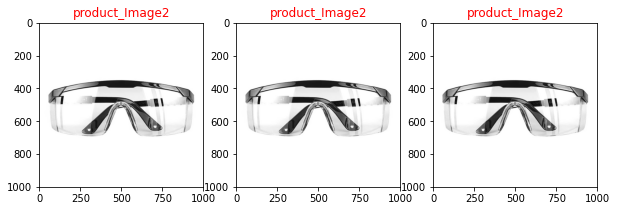

In [ ]:
#Let's get one sample image for the duplicated images
product2 = train_data1[train_data1['image'] == all_images_dup[100]]
print("Number of Products: ", len(product2))


plt.figure(figsize=(10,15))
j = 1

get_img_paths = product2['image'].values.tolist()
for img_path in get_img_paths:

  plt.title('product_Image2', color = 'red')
  img1 = Image.open(img_path)
  plt.subplot(1, 3, j)
  plt.imshow(img1)
  j += 1

plt.title('product_Image2', color = 'red')
plt.show()

<h4><font color='brown'>Product3</font></h4>

Number of Products:  2


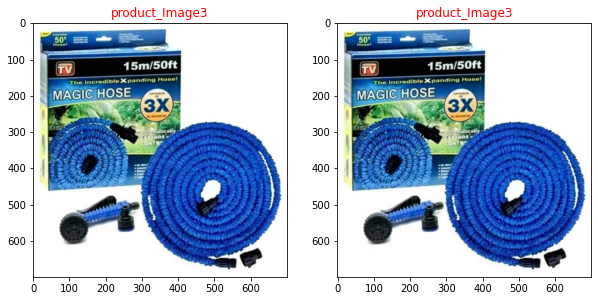

In [ ]:
#Let's get one sample image for the duplicated images
product3 = train_data1[train_data1['image'] == all_images_dup[700]]
print("Number of Products: ", len(product3))


plt.figure(figsize=(10,15))
j = 1

get_img_paths = product3['image'].values.tolist()
for img_path in get_img_paths:

  plt.title('product_Image3', color = 'red')
  img1 = Image.open(img_path)
  plt.subplot(1, 2, j)
  plt.imshow(img1)
  j += 1

plt.title('product_Image3', color = 'red')
plt.show()

<h4><font color='brown'>Product4</font></h4>

Number of Products:  6


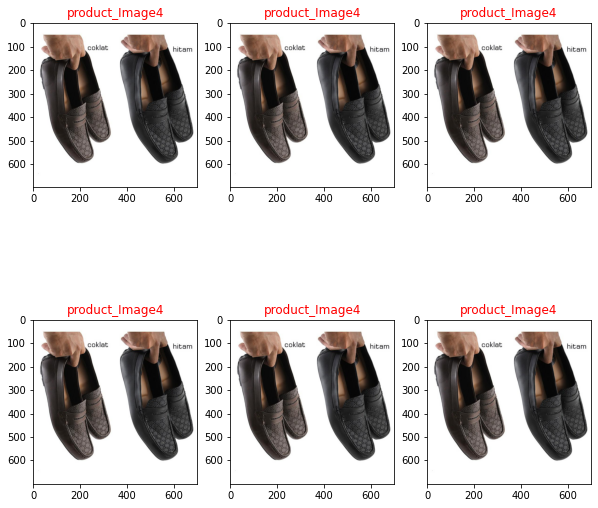

In [ ]:
#Let's get one sample image for the duplicated images
product4 = train_data1[train_data1['image'] == 'fcfce263bfcebb6aeecc27423e1ec184.jpg']
print("Number of Products: ", len(product4))


plt.figure(figsize=(10,10))
j = 1

get_img_paths = product4['image'].values.tolist()
for img_path in get_img_paths:

  plt.title('product_Image4', color = 'red')
  img1 = Image.open(img_path)
  plt.subplot(2, 3, j)
  plt.imshow(img1)
  j += 1

plt.title('product_Image4', color = 'red')
plt.show()

- **Removing the Duplicates**

In [ ]:
#Let's Clean the duplicate Images
train_data1.drop_duplicates(subset ="image", keep = 'first', inplace = True)
print("Number of datapoints after removing duplicates: ", train_data1.shape[0])

Number of datapoints after removing duplicates:  32412


### OCR Features [Optical Character Recognition] 

- https://www.youtube.com/watch?v=fn7A50rBtD0

In [ ]:

!sudo add-apt-repository ppa:alex-p/tesseract-ocr

  The Tesseract OCR engine was one of the top 3 engines in the 1995
 UNLV Accuracy test. Between 1995 and 2006 it had little work done on
 it, but since then it has been improved extensively by Google and is
 probably one of the most accurate open source OCR engines
 available. It can read a wide variety of image formats and convert
 them to text in over 40 languages. This package includes the command
 line tool.
 More info: https://launchpad.net/~alex-p/+archive/ubuntu/tesseract-ocr
Press [ENTER] to continue or Ctrl-c to cancel adding it.

Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Get:5 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 k

In [ ]:
!sudo apt-get update

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:6 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:8 http://ppa.launchpad.net/alex-p/tesseract-ocr/ubuntu bionic InRelease
Hit:10 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:11 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:12 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:13 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:14 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:15 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bioni

In [ ]:
!sudo apt install tesseract-ocr

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libtesseract4 tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
The following packages will be upgraded:
  libtesseract4
1 upgraded, 3 newly installed, 0 to remove and 49 not upgraded.
Need to get 6,161 kB of archives.
After this operation, 16.3 MB of additional disk space will be used.
Get:1 http://ppa.launchpad.net/alex-p/tesseract-ocr/ubuntu bionic/main amd64 libtesseract4 amd64 4.1.1+git4247-97079fa3-1ppa1~bionic1 [1,260 kB]
Get:2 http://ppa.launchpad.net/alex-p/tesseract-ocr/ubuntu bionic/main amd64 tesseract-ocr-eng all 1:4.0.0+git39-6572757-1ppa1~bionic1 [1,589 kB]
Get:3 http://ppa.launchpad.net/alex-p/tesseract-ocr/ubuntu bionic/main amd64 tesseract-ocr-osd all 1:4.0.0+git39-6572757-1ppa1~bionic1 [2,992 kB]
Get:4 http://ppa.launchpad.net/alex-p/te

In [ ]:
!sudo apt install libtesseract-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libarchive-dev libarchive13 liblept5 libleptonica-dev
Suggested packages:
  lrzip
The following NEW packages will be installed:
  libarchive-dev libleptonica-dev libtesseract-dev
The following packages will be upgraded:
  libarchive13 liblept5
2 upgraded, 3 newly installed, 0 to remove and 47 not upgraded.
Need to get 4,615 kB of archives.
After this operation, 15.2 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libarchive13 amd64 3.2.2-3.1ubuntu0.7 [288 kB]
Get:2 http://ppa.launchpad.net/alex-p/tesseract-ocr/ubuntu bionic/main amd64 liblept5 amd64 1.78.0-1+nmu1ppa1~bionic1 [985 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libarchive-dev amd64 3.2.2-3.1ubuntu0.7 [470 kB]
Get:4 http://ppa.launchpad.net/alex-p/tesseract-ocr/ubuntu bionic/main amd64 liblepto

In [ ]:
!sudo pip install pytesseract

  Created wheel for pytesseract: filename=pytesseract-0.3.7-py2.py3-none-any.whl size=13953 sha256=3ccc00e1bf0af91d94f1a998e8845e36dd010d6b531c265d3b821359c426346c
  Stored in directory: /root/.cache/pip/wheels/81/20/7e/1dd0daad1575d5260916bb1e9781246430647adaef4b3ca3b3
Successfully built pytesseract


In [ ]:
#Checking the installation.
!tesseract --version

tesseract 4.1.1-rc2-25-g9707
 leptonica-1.78.0
  libgif 5.1.4 : libjpeg 8d (libjpeg-turbo 1.5.2) : libpng 1.6.34 : libtiff 4.0.9 : zlib 1.2.11 : libwebp 0.6.1 : libopenjp2 2.3.0
 Found AVX2
 Found AVX
 Found FMA
 Found SSE
 Found libarchive 3.2.2 zlib/1.2.11 liblzma/5.2.2 bz2lib/1.0.6 liblz4/1.7.1


In [ ]:
import cv2
import numpy as np
import pytesseract

In [ ]:
#Getting all image paths
all_images_paths = train_data1['image'].values.tolist()


i = 0
#for storing the text of images
all_images_text = []
for img_path in all_images_paths:
    image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    text = pytesseract.image_to_string(image)
    text = " ".join(text.split())
    if len(text) > 0:
      all_images_text.append(text)
    else:
      all_images_text.append('No words existed')
    if i == 2000:
      print("2000 completed: ")
      i = 0
    i += 1
train_data1['image_txt'] = all_images_text
train_data1.to_csv('/content/drive/MyDrive/AppliedAI/DocumentClassification/all_data.csv', header=True)

2000 completed: 
2000 completed: 
2000 completed: 
2000 completed: 
2000 completed: 
2000 completed: 
2000 completed: 
2000 completed: 
2000 completed: 
2000 completed: 
2000 completed: 
2000 completed: 
2000 completed: 
2000 completed: 
2000 completed: 
2000 completed: 


**Wordcloud for OCR Data:  Images**

In [ ]:
train_data1 = pd.read_csv('/content/drive/MyDrive/AppliedAI/DocumentClassification/all_data.csv')
train_data1.drop('Unnamed: 0', axis = 1, inplace = True)
print("Shape of the train_data1: ", train_data1.shape)
train_data1.head()

Shape of the train_data1:  (32412, 6)


,posting_id,image,image_phash,title,label_group,image_txt
0,train_129225211,0000a68812bc7e98c42888dfb1c07da0.jpg,94974f937d4c2433,Paper Bag Victoria Secret,249114794,VICTORIA'S SECRET ry
1,train_3386243561,00039780dfc94d01db8676fe789ecd05.jpg,af3f9460c2838f0f,"Double Tape 3M VHB 12 mm x 4,5 m ORIGINAL / DO...",2937985045,Side Visor Mirror Cover Side Skirt vinow iT Bo...
2,train_2288590299,000a190fdd715a2a36faed16e2c65df7.jpg,b94cb00ed3e50f78,Maling TTS Canned Pork Luncheon Meat 397 gr,2395904891,No words existed
3,train_2406599165,00117e4fc239b1b641ff08340b429633.jpg,8514fc58eafea283,Daster Batik Lengan pendek - Motif Acak / Camp...,4093212188,No words existed
4,train_3369186413,00136d1cf4edede0203f32f05f660588.jpg,a6f319f924ad708c,Nescafe \xc3\x89clair Latte 220ml,3648931069,is\ Nestlé | OFFICIAL STORE 220ml 5 We NESCAFE...


In [ ]:
#Let's get only the  images which have words and see which some analysis of the txt

sample_data = train_data1[train_data1['image_txt'] != 'No words existed']

In [ ]:
# https://www.geeksforgeeks.org/python-lemmatization-with-nltk/#:~:text=Lemmatization%20is%20the%20process%20of,similar%20meaning%20to%20one%20word.


# we use the list of stop words that are downloaded from nltk lib.

from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
# print ('Number of stop words:', len(stop_words))

# import these modules
from nltk.stem import WordNetLemmatizer
import regex as re
lemmatizer = WordNetLemmatizer()



def preprocess_txt(Input_Text):

  #Step: 0 ===> Convert to lowercase
  Input_Text = Input_Text.lower()
  
  #Step:1 ===> Remove all the newlines('\n'), tabs('\t'), "-", "\"
  # Input_Text  = Input_Text.replace('\n', '')
  # Input_Text  = Input_Text.replace('\t', '')
  # Input_Text  = Input_Text.replace('-', '')
  # Input_Text  = Input_Text.replace('/', '')
  Input_Text = re.sub(r'[\n\t\r\\-]+', ' ', Input_Text)


  #Step: 2 ====> Deconractions (can't -> can not, 's -> is, i've -> i have, i'm -> i am, you're -> you are, i'll --> i will )
  Input_Text = re.sub(r"won't", "will not", Input_Text)
  Input_Text = re.sub(r"can\'t", "can not", Input_Text)
 
  # general
  Input_Text = re.sub(r"n\'t", " not", Input_Text)
  Input_Text = re.sub(r"\'re", " are", Input_Text)
  Input_Text = re.sub(r"\'s", " is", Input_Text)
  Input_Text = re.sub(r"\'d", " would", Input_Text)
  Input_Text = re.sub(r"\'ll", " will", Input_Text)
  Input_Text = re.sub(r"\'t", " not", Input_Text)
  Input_Text = re.sub(r"\'ve", " have", Input_Text)
  Input_Text = re.sub(r"\'m", " am", Input_Text)

  #Step:3  ---------> replace all the words except "A-Za-z_0-9" with space. 
  Input_Text = re.sub(r"[^0-9a-zA-Z_]+", ' ', Input_Text) 

  #splitting all the words and removing the stop word and also performming Lemmatization
  new_Text = ''
  all_tokens = nltk.word_tokenize(Input_Text)
  for word in all_tokens:
    if word not in stop_words:
      lemma = lemmatizer.lemmatize(word)
      new_Text += ' ' + lemma

  return new_Text

In [ ]:
#Preprocessing all Texts
all_preprocessed_txt_img = sample_data['image_txt'].apply(lambda x: preprocess_txt(x))

In [ ]:
sample_data['preprocessed_img_txt'] = all_preprocessed_txt_img.values.tolist()

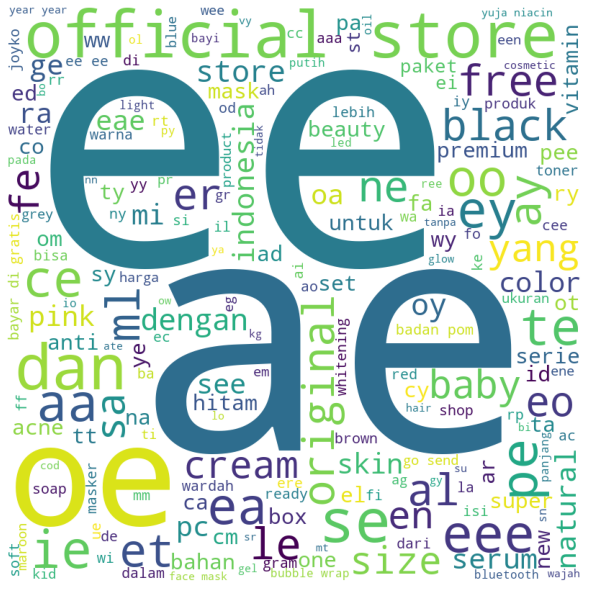

In [ ]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 

comment_words = '' 
stopwords = set(STOPWORDS) 

for val in sample_data['preprocessed_img_txt']: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "

    
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

#### Doing Analysis on the Number of characters and words in Image text

In [ ]:
all_preprocessed_imgtext = sample_data['preprocessed_img_txt'].values.tolist()

lengths_chars = []
for txt in all_preprocessed_imgtext:
  lengths_chars.append(len(txt))

#sanity check
for i in range(5):
  print(all_preprocessed_imgtext[i], lengths_chars[i])

sample_data['len_char'] = lengths_chars

 victoria secret ry 19
 side visor mirror cover side skirt vinow body side molding emblem door handle cover fei et ont ule b ct sr le ea 113
 nestl official store 220ml 5 nescafe eclair latte 50
 oqsaie 39 43 13
 saa u 5050 1led 16


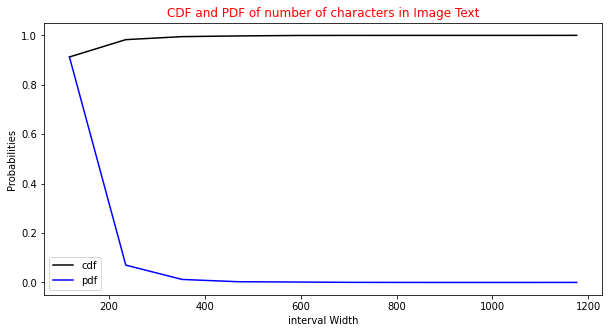

In [ ]:
#Let's Do some Basic Analysis on titles
counts, bins_edges = np.histogram(sample_data['len_char'], bins = 10)
#print(counts)
#print(bins_edges)

pdf = counts/sum(counts)
cdf = np.cumsum(pdf)

plt.figure(figsize=(10,5))  
plt.title('CDF and PDF of number of characters in Image Text', color = 'red')
plt.xlabel('interval Width')
plt.ylabel('Probabilities')

plt.plot(bins_edges[1:], cdf, label = 'cdf', color = 'black')
plt.plot(bins_edges[1:],pdf, label = 'pdf', color = 'blue' )
plt.legend()

plt.show()

- From above, we can make conclusion that maximum Images lie less than 200 characters

In [ ]:
all_preprocessed_imgtext = sample_data['preprocessed_img_txt'].values.tolist()

lengths_words = []
for txt in all_preprocessed_imgtext:
  tot_words = len(txt.split(' ')) - 1  #Here -1 because taking the count of space of first one
  lengths_words.append(tot_words)

#sanity check
for i in range(5):
  print(all_preprocessed_imgtext[i], lengths_words[i])

sample_data['len_words'] = lengths_words

 victoria secret ry 3
 side visor mirror cover side skirt vinow body side molding emblem door handle cover fei et ont ule b ct sr le ea 23
 nestl official store 220ml 5 nescafe eclair latte 8
 oqsaie 39 43 3
 saa u 5050 1led 4


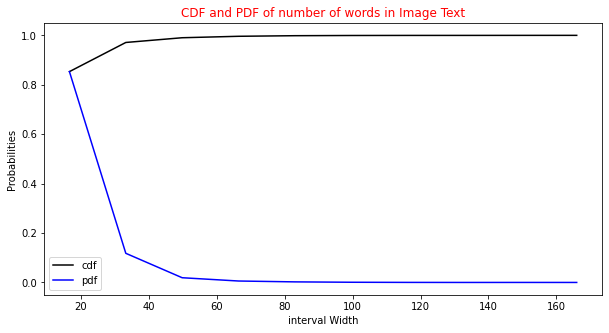

In [ ]:
#Let's Do some Basic Analysis on titles
counts, bins_edges = np.histogram(sample_data['len_words'], bins = 10)
#print(counts)
#print(bins_edges)

pdf = counts/sum(counts)
cdf = np.cumsum(pdf)

plt.figure(figsize=(10,5))  
plt.title('CDF and PDF of number of words in Image Text', color = 'red')
plt.xlabel('interval Width')
plt.ylabel('Probabilities')

plt.plot(bins_edges[1:], cdf, label = 'cdf', color = 'black')
plt.plot(bins_edges[1:],pdf, label = 'pdf', color = 'blue' )
plt.legend()

plt.show()

- Plot depicts that in most of the Image texts are less than 20 and that nearly 80% lie less than that 20 words

In [ ]:
train_data1.columns

Index(['posting_id', 'image', 'image_phash', 'title', 'label_group'], dtype='object')

<h1 align = 'center'><font color='red'>image_phash</font></h1>

- https://en.wikipedia.org/wiki/Perceptual_hashing

- https://www.youtube.com/watch?v=pyzMP9qvxl0

### a perceptual hash of the image


- If we look at two pictures, we don't only see the pictures to say similar  we also understand the content inside that picture to determine it.

- For a computer, it is difficult to understand the contextual understanding of an image and extremely challenging for a computer to say similar by that.

- generally for hash even a tiny little change in the original image creates a huge change in the computed hash.

- When we have two things similar, we have a very similar hashing or nearly similar hashing, it's very different hashes for dissimilar things.This is called exactly perceptual hashing.

In [ ]:
#sample datapoints of image_phash
train_data1['image_phash'].head()

0    94974f937d4c2433
1    af3f9460c2838f0f
2    b94cb00ed3e50f78
3    8514fc58eafea283
4    a6f319f924ad708c
Name: image_phash, dtype: object

In [ ]:
#Let's look at the count of some label Groups

#Top 5 counts
label_counts = train_data1['image_phash'].value_counts()

print("Top 5 Label Counts: ")
print(label_counts[: 5])

print('*' * 50)

#Last 5 counts
print("Last 5 Label Counts: ")
print(label_counts[-6: -1])
print('*' * 50)


Top 5 Label Counts: 
fad28daa2ad05595    19
e992966d4ba49761    13
ada4c4781f93686e    11
84563f696135c79a    11
f7b9c25864433966     9
Name: image_phash, dtype: int64
**************************************************
Last 5 Label Counts: 
ae1ef1e1f0d40e0b    1
a5869adb9b643398    1
d113cd79620467f6    1
bd88c63a9d7498c3    1
bb99c2c422b6d16d    1
Name: image_phash, dtype: int64
**************************************************


In [ ]:
train_data1[train_data1['image_phash'] == 'fad28daa2ad05595']

,posting_id,image,image_phash,title,label_group
579,train_1015625393,04a00bccb7f1560e755f5f1def73db59.jpg,fad28daa2ad05595,Sugar Baby Organic Healthy Cot Sheet Perlak Bayi,997220911
1978,train_1942146514,0f459b1e8aa89ee9e79b2ec95440e9c3.jpg,fad28daa2ad05595,Perlak Karet Organic Bayi Sugar Baby uk 90x60 ...,997220911
3916,train_1062957964,1dbf735adb93d54e6340af02f9b5472e.jpg,fad28daa2ad05595,MURAH!! SUGAR BABY Perlak (Perlak Karet Waterp...,997220911
5919,train_4270145275,2cd540e8c1810d1d1aaf3d73b8116cdc.jpg,fad28daa2ad05595,Perlak Bayi Sugar Baby (Alas Ompol Waterproof ...,997220911
8993,train_989190235,43af52158ed9acd8274a7d6d6c109dfc.jpg,fad28daa2ad05595,Perlak Waterproof Bayi SUGAR BABY 90 x 60 cm O...,997220911
10768,train_3574291998,50ef370271e8c7e00eaaf018c9cd93dd.jpg,fad28daa2ad05595,Sugar Baby Pink Kitten Organic Healthy Cot She...,997220911
12248,train_1943986671,5c1e0f695fb5ab7b0d83de0fef4bfdaf.jpg,fad28daa2ad05595,Perlak Bayi organik SUGAR BABY / Perlak karet ...,997220911
17760,train_3141138577,8591ed8b5bc268e386a66206bb233b2f.jpg,fad28daa2ad05595,Perlak Sugar Baby 90x60cm,997220911
20893,train_1224240247,9ce299d95fb2a89ff4ecb207cb4f0fe6.jpg,fad28daa2ad05595,Sugar Baby Perlak / Rubber Cot Sheet,997220911
22290,train_973648209,a75890cf09d9c9487ee3530d856ab456.jpg,fad28daa2ad05595,Perlak Sugarbaby Organik / Perlak Bayi Karet,997220911


**Let's Examine the count of the 'image_phash'**

Top 5 Image phash Counts: 
fad28daa2ad05595    19
e992966d4ba49761    13
ada4c4781f93686e    11
84563f696135c79a    11
f7b9c25864433966     9
Name: image_phash, dtype: int64
**************************************************


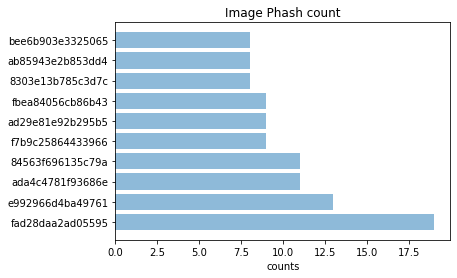

In [ ]:
#Top 5 counts
image_phash_counts = train_data1['image_phash'].value_counts()

print("Top 5 Image phash Counts: ")
print(image_phash_counts[: 5])

print('*' * 50)


images_phashes = image_phash_counts[: 10].keys().tolist()

counts = image_phash_counts[: 10].values.tolist()

y_pos = np.arange(len(images_phashes))

plt.barh(y_pos, counts, align='center', alpha=0.5)
plt.yticks(y_pos, images_phashes)
plt.xlabel('counts')
plt.title('Image Phash count')
plt.show()

- Here From above we can see that labels 'fad28daa2ad05595' tops the most with frequency count of 19 and 'e992966d4ba49761' follows the second high frequency count with 13

<h1 align = 'center'><font color='red'>Titles</font></h1>

#### Part-1

- Let's do preprocessing and cleaning of Text Data

In [ ]:
#Sanity Check
preprocess_txt('Double Tape 3M VHB 12 mm x 4,5 m ORIGINAL / DOUBLE FOAM TAPE')

' double tape 3m vhb 12 mm x 4 5 original double foam tape'

In [ ]:
#Preprocessing all Texts
all_preprocessed_txt = train_data1['title'].apply(lambda x: preprocess_txt(x))

In [ ]:
train_data1['title_preprocessed'] = all_preprocessed_txt.values.tolist()

In [ ]:
train_data1.head()

,posting_id,image,image_phash,title,label_group,title_preprocessed
0,train_129225211,0000a68812bc7e98c42888dfb1c07da0.jpg,94974f937d4c2433,Paper Bag Victoria Secret,249114794,paper bag victoria secret
1,train_3386243561,00039780dfc94d01db8676fe789ecd05.jpg,af3f9460c2838f0f,"Double Tape 3M VHB 12 mm x 4,5 m ORIGINAL / DO...",2937985045,double tape 3m vhb 12 mm x 4 5 original doubl...
2,train_2288590299,000a190fdd715a2a36faed16e2c65df7.jpg,b94cb00ed3e50f78,Maling TTS Canned Pork Luncheon Meat 397 gr,2395904891,maling tt canned pork luncheon meat 397 gr
3,train_2406599165,00117e4fc239b1b641ff08340b429633.jpg,8514fc58eafea283,Daster Batik Lengan pendek - Motif Acak / Camp...,4093212188,daster batik lengan pendek motif acak campur ...
4,train_3369186413,00136d1cf4edede0203f32f05f660588.jpg,a6f319f924ad708c,Nescafe \xc3\x89clair Latte 220ml,3648931069,nescafe xc3 x89clair latte 220ml


### WordCloud for titles

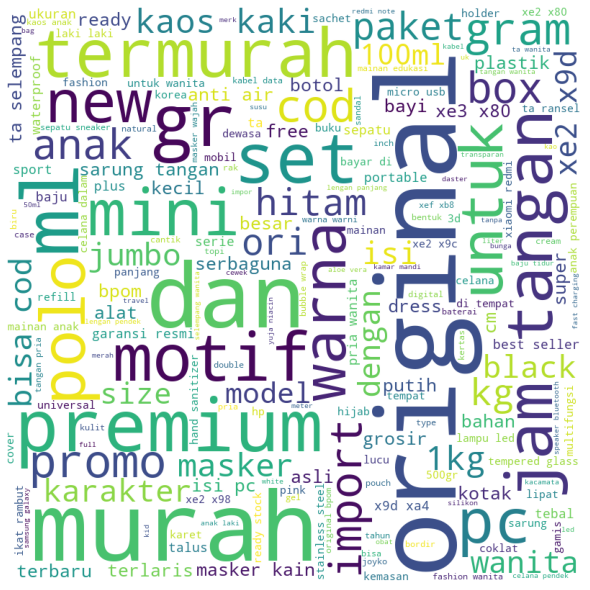

In [ ]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 

comment_words = '' 
stopwords = set(STOPWORDS) 

for val in train_data1['title_preprocessed']: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "

    
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [ ]:
all_preprocessed_text = train_data1['title_preprocessed'].values.tolist()

txt_contain_original = []
for txt in all_preprocessed_text:
  if 'original' in txt.split(' '):
    txt_contain_original.append(txt)

for sample_txt in txt_contain_original[: 5]:
  print(sample_txt)
  print('*' * 20)

 double tape 3m vhb 12 mm x 4 5 original double foam tape
********************
 charger vizz vz tc11 batok charger vizz 1a original real kapasitas
********************
 saffron 0 25 gr 2 gr super negin premium quality original
********************
 laneige cica sleeping mask sample 10ml original masker wajah leneige masker tidur lanege
********************
 charger xiaomi original fast charging qc 3 0 5v 2 5a 9v 2a
********************


- From the above wordCloud, we can see that words like Original, termurah, murah, premium, import, polo etc have occured most of the times and to best of my knowledge, I think that Original and premium are the word that often embedded to titles so as to get customer trust over the products.

#### Doing Analysis on the Number of characters and words in Title

In [ ]:
all_preprocessed_text = train_data1['title_preprocessed'].values.tolist()

lengths_chars = []
for txt in all_preprocessed_text:
  lengths_chars.append(len(txt))

#sanity check
for i in range(5):
  print(all_preprocessed_text[i], lengths_chars[i])

train_data1['len_char'] = lengths_chars

 paper bag victoria secret 26
 double tape 3m vhb 12 mm x 4 5 original double foam tape 57
 maling tt canned pork luncheon meat 397 gr 43
 daster batik lengan pendek motif acak campur leher kancing dpt001 00 batik karakter alhadi 91
 nescafe xc3 x89clair latte 220ml 33


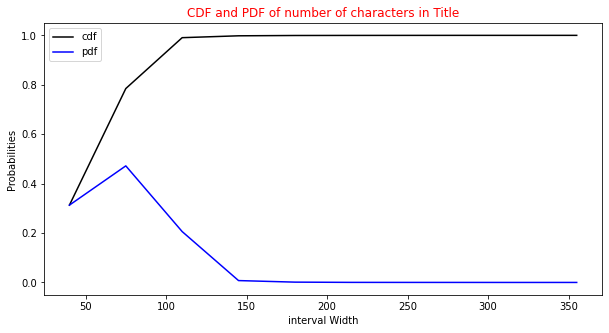

In [ ]:
#Let's Do some Basic Analysis on titles
counts, bins_edges = np.histogram(train_data1['len_char'], bins = 10)
#print(counts)
#print(bins_edges)

pdf = counts/sum(counts)
cdf = np.cumsum(pdf)

plt.figure(figsize=(10,5))  
plt.title('CDF and PDF of number of characters in Title', color = 'red')
plt.xlabel('interval Width')
plt.ylabel('Probabilities')

plt.plot(bins_edges[1:], cdf, label = 'cdf', color = 'black')
plt.plot(bins_edges[1:],pdf, label = 'pdf', color = 'blue' )
plt.legend()

plt.show()

- From above, we can make some conclusion that most of the titles have words in between 50 - 100 and 50% of them lie nearly lie less than 70

In [ ]:
all_preprocessed_text = train_data1['title_preprocessed'].values.tolist()

lengths_words = []
for txt in all_preprocessed_text:
  tot_words = len(txt.split(' ')) - 1  #Here -1 because taking the count of space of first one
  lengths_words.append(tot_words)

#sanity check
for i in range(5):
  print(all_preprocessed_text[i], lengths_words[i])

train_data1['len_words'] = lengths_words

 paper bag victoria secret 4
 double tape 3m vhb 12 mm x 4 5 original double foam tape 13
 maling tt canned pork luncheon meat 397 gr 8
 daster batik lengan pendek motif acak campur leher kancing dpt001 00 batik karakter alhadi 14
 nescafe xc3 x89clair latte 220ml 5


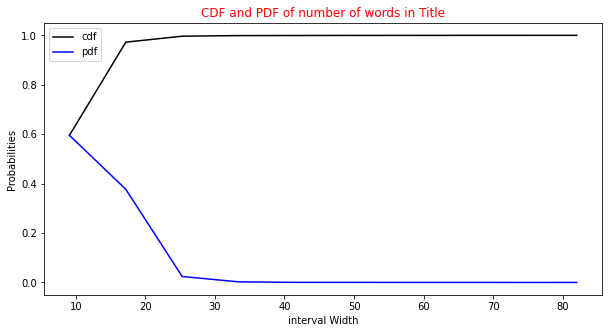

In [ ]:
#Let's Do some Basic Analysis on titles
counts, bins_edges = np.histogram(train_data1['len_words'], bins = 10)
#print(counts)
#print(bins_edges)

pdf = counts/sum(counts)
cdf = np.cumsum(pdf)

plt.figure(figsize=(10,5))  
plt.title('CDF and PDF of number of words in Title', color = 'red')
plt.xlabel('interval Width')
plt.ylabel('Probabilities')

plt.plot(bins_edges[1:], cdf, label = 'cdf', color = 'black')
plt.plot(bins_edges[1:],pdf, label = 'pdf', color = 'blue' )
plt.legend()

plt.show()

- Plot depicts that in most of the titles have words less than equal to nearly 25 and nearly 50 % of them have words less than nearly 12-13.

<h1 align = 'center'><font color='red'>Analysis of Label Group</font></h1>

- Let's Group the data based on labels and understand internally of what makes them to fit in the Same.

refer: https://www.geeksforgeeks.org/python-pandas-dataframe-groupby/

In [ ]:
grp_labels = train_data1.groupby('label_group')


# Let's print the first entries in all the groups formed.
grp_labels.first()

,posting_id,image,image_phash,title,title_preprocessed
label_group,,,,,
258047,train_1646767365,1d7aadc7503b2b4539cc9a5fe41979dd.jpg,e925873ed09cd08f,Sarung celana wadimor original 100% dewasa dan...,sarung celana wadimor original 100 dewasa dan...
297977,train_2865605743,3977f4e7a47c73568c5e9fcb61723b4b.jpg,bfc3cc1cc636c14c,Wall Sticker / WallSticker - Submarine Measur...,wall sticker wallsticker submarine measure sk...
645628,train_318767180,58167b1c1bf3b33226ad342f9bbc3bc9.jpg,fbcf38c790d086b0,GROSIR LVN COLLAGEN / COLAGEN STROBERI PEMUTIH...,grosir lvn collagen colagen stroberi pemutih ...
801176,train_835214606,24c9d8eaad9a407c751866f81c6ba1a8.jpg,b9c1c7c6393c9634,mainan bayi gantung putar musik merry go round,mainan bayi gantung putar musik merry go round
887886,train_1073877693,6231e59976e41d5dc555853b64701dfc.jpg,e1da9e31b9866139,TP-LINK Wireless N Router TL-WR940N 450Mbps TP...,tp link wireless n router tl wr940n 450mbps t...
...,...,...,...,...,...
4292154092,train_2819580772,1f8fe47201e6f9a206370299fe6d760e.jpg,ea28096acc96b72f,Mama Lemon Fresh Lemon Pouch 470ml,mama lemon fresh lemon pouch 470ml
4292520070,train_2681444479,38923384ef3b3d123ce824b261fea622.jpg,ad29e81e92b295b5,Kuas Mentega Silikon Roti Cake Mentega Food Brush,kuas mentega silikon roti cake mentega food b...
4292939171,train_1168451063,13dc07354ad8b7c5dde440d652edfd62.jpg,a210bd6e3f3d9134,Boster antena remot sanex wa-850 TG/950TG,boster antena remot sanex wa 850 tg 950tg


In [ ]:
#all unique group
#sample of them
sample_labels = train_data1['label_group'].unique()
print(sample_labels[: 10]) 

[ 249114794 2937985045 2395904891 4093212188 3648931069 2660605217
 1835033137 1565741687 2359912463 2630990665]


<h4><font color='brown'>Label_Group1</font></h4>

2


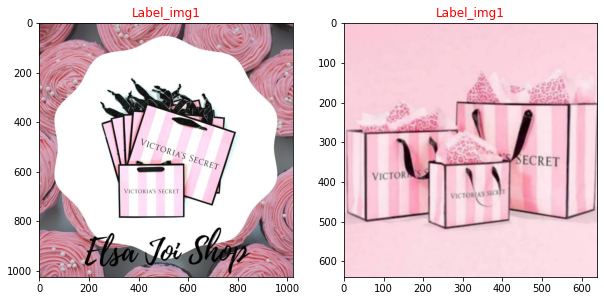

In [ ]:
# Finding the values contained in the "249114794" and looking the products here.

plt.figure(figsize=(10, 10))
j = 1

get_img_paths = grp_labels.get_group(249114794)['image'].values.tolist()
print(len(get_img_paths))
for img_path in get_img_paths:

  plt.title('Label_img1', color = 'red')
  img1 = Image.open(img_path)
  plt.subplot(1, 2, j)
  plt.imshow(img1)
  j += 1

plt.title('Label_img1', color = 'red')
plt.show()

<h4><font color='brown'>Label_Group2</font></h4>

2


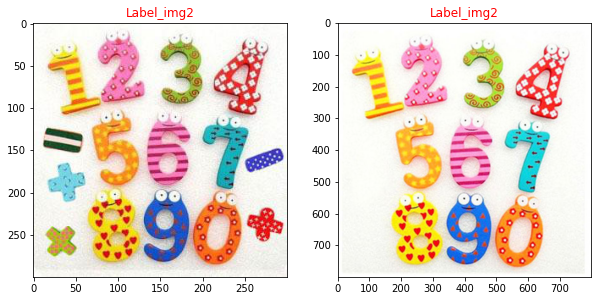

In [ ]:
# Finding the values contained in the "249114794" and looking the products here.

plt.figure(figsize=(10, 10))
j = 1


get_img_paths = grp_labels.get_group(2359912463)['image'].values.tolist()

print(len(get_img_paths))
for img_path in get_img_paths:

  plt.title('Label_img2', color = 'red')
  img1 = Image.open(img_path)
  plt.subplot(1, 2, j)
  plt.imshow(img1)
  j += 1

plt.title('Label_img2', color = 'red')
plt.show()

<h4><font color='brown'>Label_Group3</font></h4>

7


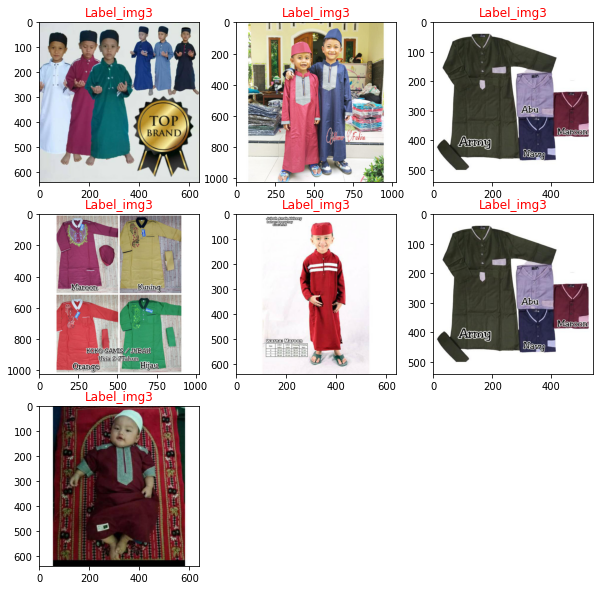

In [ ]:
# Finding the values contained in the "249114794" and looking the products here.

plt.figure(figsize=(10, 10))
j = 1


get_img_paths = grp_labels.get_group(1835033137)['image'].values.tolist()

print(len(get_img_paths))
for img_path in get_img_paths:

  plt.title('Label_img3', color = 'red')
  img1 = Image.open(img_path)
  plt.subplot(3, 3, j)
  plt.imshow(img1)
  j += 1

plt.title('Label_img3', color = 'red')
plt.show()

2


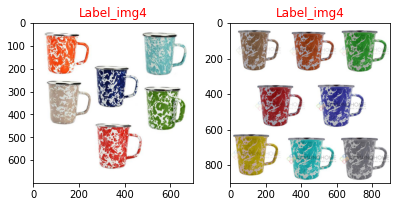

In [ ]:
# Finding the values contained in the "249114794" and looking the products here.

plt.figure(figsize=(10, 10))
j = 1


get_img_paths = grp_labels.get_group(sample_labels[-3])['image'].values.tolist()

print(len(get_img_paths))
for img_path in get_img_paths:

  plt.title('Label_img4', color = 'red')
  img1 = Image.open(img_path)
  plt.subplot(3, 3, j)
  plt.imshow(img1)
  j += 1

plt.title('Label_img4', color = 'red')
plt.show()

**Summary of Observations**

- 1. From the analysis, we get to know that among all the label groups, ['994676122', '159351600', '562358068', '3113678103' , '1163569239'] these have occured the most number of times with frequency of 51.

- 2. [3882731210, 3996065489, 517023446 , 2101581536 , 3460538113] are the one that repeated least number of times with frequency count of 2.

- 3. most of the titles have characters less than 100 and 50% of them lie nearly lie less than 70

- 4. most of the titles have words less than equal to nearly 25 and nearly 50 % of them have words less than nearly 12-13.

- 5. Perpetual-hash may be helpful for clustering similar label groups and we can give it a Try.

- 5. From the above wordCloud, we can see that words like Original, termurah, murah, premium, import, polo etc have occured most of the times and to best of my knowledge, I think that Original and premium are the word that often embedded to titles so as to get customer trust over the products.

- 6. The OCR Image text have maximum Images lie less than 200 characters.

- 7. In CCR Images, most of the Image texts have words less than 20 and that nearly 80% lie less than that 20 words

**Further steps**

- 1. Actually the problem we are trying to solve has no single rules of steps, we try and experiment with diﬀerent techniques for both Text and Images and make an eye on the cross validation score and whichever gives a good score, we pick it up. 

- 2. We use pairwise distance score or Knn model to get the similar Products on all the features we get.

- 3. Basically for Text, after preprocessing to get N-D we can try with Bag of words, TF-IDF,  word2Vec, avg-w2v or can try transferLearning with Advance state of the art DeepLearning models like BERT to generate WordEmbeddings and see how Text alone helping in predictions for Product Similarity. 

- 4. And for Images, we can try diﬀerent TransferLearning models like Vgg16, Resnet, Alexnet and various others and see how image alone helps in predictions. 

- 5. We can try with weighted similarities if any of the Text or Image is performing better over the other that means increasing the weight of the Text vector by adding a higher constant value than Image vector.

-  6. Finally, Combine Both Text Embeddings and Image Embedding and calculate pairwise distances and check how this impacts for products similarity.
